In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set

start_date = '2016-08-23'
end_date = '2017-08-23'

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

trip_temps = calc_temps(start_date, end_date)
print(trip_temps) 
        

[(58.0, 74.59058295964125, 87.0)]


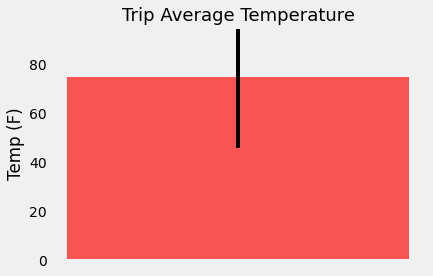

In [11]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_df = pd.DataFrame(trip_temps, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
tmax_tmin = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
plt.bar(avg_temp, height=74.6, yerr=tmax_tmin, color='r', alpha=0.65, align="center")

plt.ylim(0,95)

plt.title("Trip Average Temperature", fontsize=18)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.show()

### Daily Rainfall Average

In [20]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rain_results = session.query(func.count(Measurement.prcp), Measurement.station, Station.name, Station.latitude,\
                             Station.longitude, Station.elevation).\
        filter(Measurement.date >= '2016-08-01').\
        filter(Measurement.date <= '2016-08-07').\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.prcp).desc()).all()
rain_results

[(63, 'USC00519523', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (63, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (63, 'USC00519281', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (63, 'USC00513117', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (36, 'USC00517948', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (27, 'USC00516128', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (27, 'USC00514830', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)]

In [ ]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
def daily_normals(date):
    temps = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*temps).filter(func.strftime("%m-%d", Measurement.date) == date).all() 
    
#create a list of dates for your trip 
trip_dates = pd.date_range(start_date, end_date)

# Strip off the year and save a list of strings in the format %m-%d
trip_days = trip_dates.strftime('%m-%d')

# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals = []
for day in trip_days:
    normals.append(*daily_normals(day))
    

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_dates_df = pd.DataFrame(normals, columns = ['Tmin', 'Tavg', 'Tmax'])

#make the trip dates the index
trip_dates_df ['date'] = trip_dates
trip_dates_df  = trip_dates_df .set_index('date')
trip_dates_df 


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
#make a colors list
colors = ['blue', 'coral','palegreen']

#make an area plot for the predicted temps
trip_dates_df .plot(kind='area', figsize=(12, 8), stacked=False, x_compat=True, color=colors, rot=45)

#make the labels
plt.title("Predicted Temperatures for Trip", fontsize=18)
plt.xlabel('')
plt.ylabel('Temp (F)')
plt.savefig("Predicted Temp.png")
plt.show()


## Close Session

In [ ]:
# Close Session
session.close()